## Matriz de Sombras
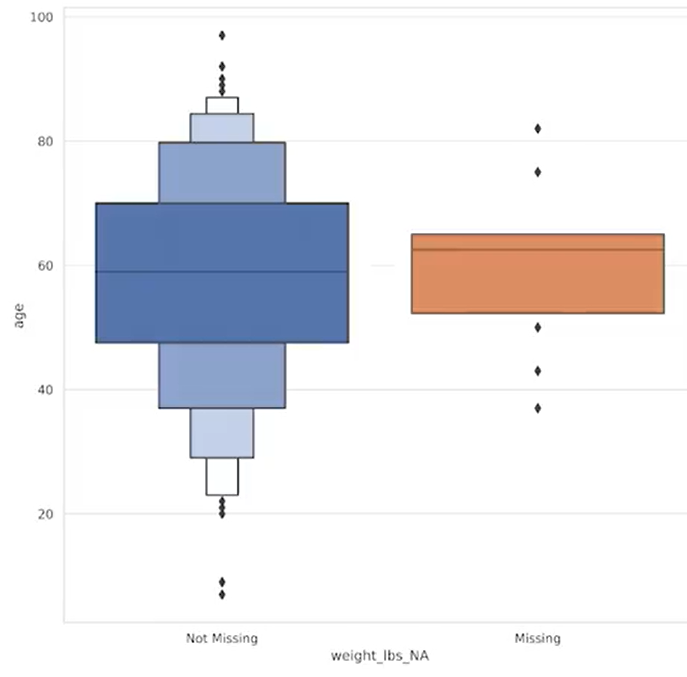
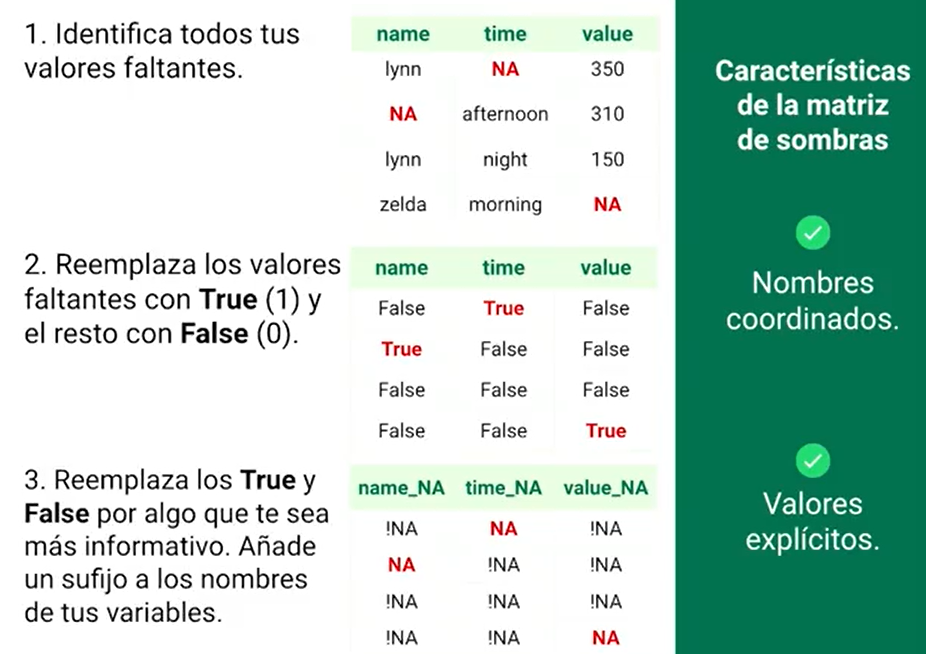
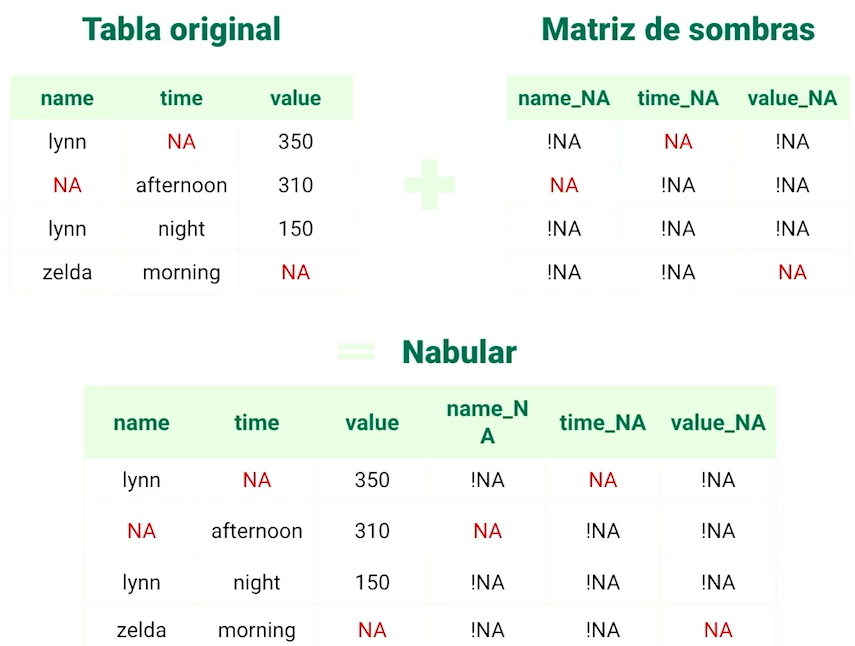

In [2]:
import pandas as pd

In [3]:
diabetes = pd.read_csv('diabetes.csv')

In [4]:
diabetes.isna().sum()
diabetes.isna().sum()[diabetes.isna().sum() > 0]


Series([], dtype: int64)

como los valores faltantes no estan como Nan, NA, sino como 0, debemos de detectarlos de una forma diferente

In [5]:
import numpy as np

# Lista de columnas que tienen ceros como datos faltantes
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Reemplazamos ceros por NaN solo en esas columnas
diabetes[cols_with_zeros] = diabetes[cols_with_zeros].replace(0, np.nan)

# Ahora sí puedes contar los valores faltantes reales
print(diabetes.isna().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Construccion de la matriz de sombras

In [6]:
(
    diabetes
    .isna()
    .replace(
        {
            False : "Not missing",
            True: "Missing"
        }
    )
    #una de las propiedades de la matriz de sombras, es tener nombres coordinados entre las variables originales
    # y estas  nuevas variables que creamos
    .add_suffix("_NA") #Sufijo
    .pipe(
        lambda shadow_matrix: pd.concat(
            [diabetes, shadow_matrix],
            axis = "columns"
        )
    )
)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_NA,Glucose_NA,BloodPressure_NA,SkinThickness_NA,Insulin_NA,BMI_NA,DiabetesPedigreeFunction_NA,Age_NA,Outcome_NA
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Not missing,Not missing,Not missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1,Not missing,Not missing,Not missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing



automatizando la matriz de sombras con bind_shadow_matrix():

In [7]:
%run ./pandas_missing_extension.py

In [8]:
(
    diabetes
    .missing
    .bind_shadow_matrix()
)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_NA,Glucose_NA,BloodPressure_NA,SkinThickness_NA,Insulin_NA,BMI_NA,DiabetesPedigreeFunction_NA,Age_NA,Outcome_NA
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing


In [19]:
(
    diabetes
    .missing
    .bind_shadow_matrix(only_missing = True)
)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Explorar estadisticos utilizando las nuevas columnas de la matriz de sombras

In [9]:
(
    diabetes
    .missing.bind_shadow_matrix(only_missing = True)
    .groupby(["Insulin_NA"])
    ["SkinThickness"]
    .describe()
)

,count,mean,std,min,25%,50%,75%,max
Insulin_NA,,,,,,,,
Missing,147.0,29.278912,10.438195,8.0,22.0,30.0,35.50,99.0
Not Missing,394.0,29.106599,10.504273,7.0,21.0,29.0,36.75,63.0


## Visualización de valores faltantes en una variable

In [11]:
import seaborn as sns

<Axes: xlabel='Insulin_NA', ylabel='SkinThickness'>

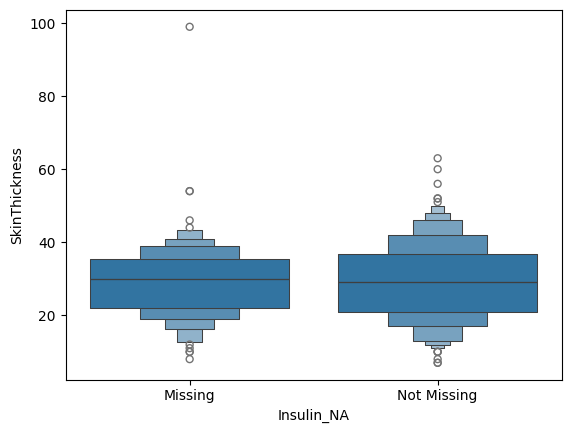

In [14]:
(
    diabetes
    .missing.bind_shadow_matrix(only_missing = True )
    .pipe(
        lambda df: (
            sns.boxenplot(
                data = df,
                x = "Insulin_NA",
                y ="SkinThickness"
            )
        )
    )
)    

Similitud o diferencia en la forma de las cajas:

Si las dos cajas (Missing vs Not Missing) son muy parecidas, eso sugiere que la variable SkinThickness no está relacionada con la ausencia de valores en Insulin.

Si son visiblemente diferentes (diferentes medianas, rangos o outliers), podría indicar un mecanismo de datos faltantes tipo MAR o MNAR.


La distribución de SkinThickness parece ligeramente diferente entre los grupos:
* Las medianas y los cuartiles son similares, pero los outliers y la dispersión cambian un poco.
* Podría ser una pequeña relación, pero no muy fuerte.

El gráfico sugiere que los valores faltantes en Insulin no están completamente al azar (MCAR), pero la diferencia no es dramática. Debemos realizar más análisis


<Axes: xlabel='Pregnancies', ylabel='Count'>

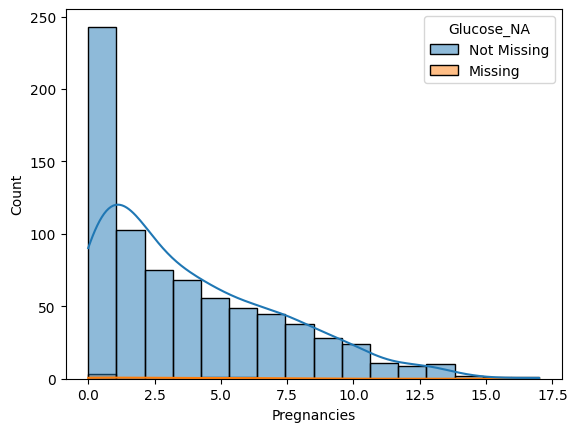

In [19]:
import seaborn as sns

sns.histplot(
    data=diabetes.missing.bind_shadow_matrix(only_missing=True),
    x="Pregnancies",
    hue="Glucose_NA",
    kde=True
)

In [ ]:
sns.histplot(
    data=diabetes.missing.bind_shadow_matrix(only_missing=True),
    x="Pregnancies",
    hue="Glucose_NA",
    kde=True
)

In [22]:
(
    diabetes
    .missing.bind_shadow_matrix(only_missing = True)
    .pipe(
        lambda df: (
            sns.distplot(
                data=diabetes.missing.bind_shadow_matrix(only_missing=True),
                x="Pregnancies",
                col = "BMI_NA",
                row = "Insuline_NA"
            )
        )
    )
)

TypeError: distplot() got an unexpected keyword argument 'data'

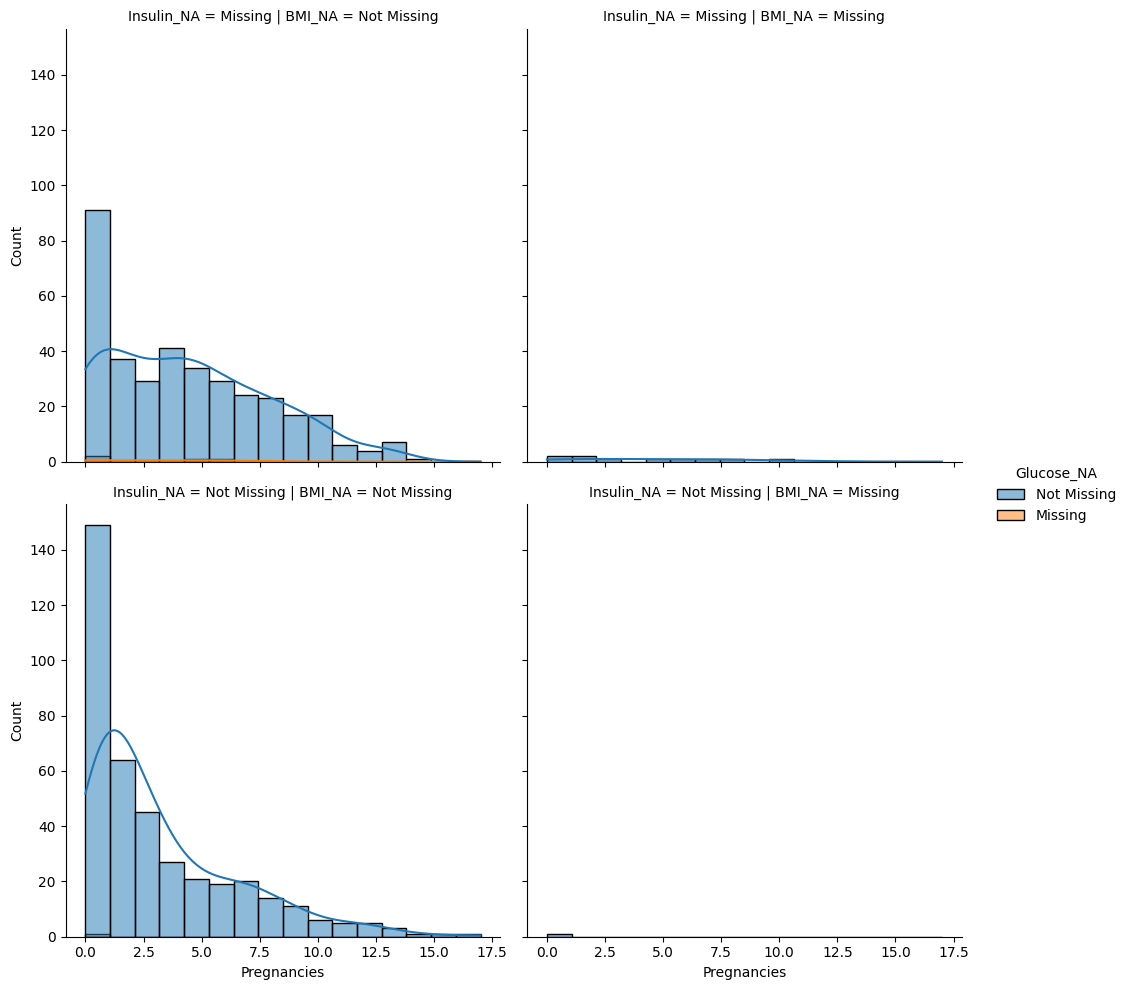

In [21]:
import seaborn as sns

sns.displot(
    data=diabetes.missing.bind_shadow_matrix(only_missing=True),
    x="Pregnancies",
    hue="Glucose_NA",
    col="BMI_NA",        # Facetas por columna
    row="Insulin_NA",    # Facetas por fila (corrige el nombre: Insulin_NA, no Insuline_NA)
    kde=True
)

## Visualización de valores faltantes en dos variables

Permite visualizar y comparar dos variables cuando a ambas le faltan valores. Un grafico muy util para este tipo de comparaciones son los scatterplot:

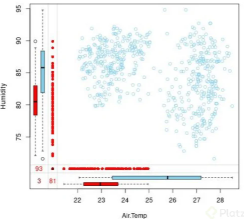

Para este ejemplo, los puntos azules indican que existe valores tanto para la temperatura como para la humedad. Los puntos rojos indican que solo hay valores para una de las variables y no para la otra. Este tipo de grafica nos ayuda a conocer donde estan agrupados los valores faltantes respecto a otras variables y se grafican fuera de la presencia de los puntos reales para que no introduzcan ruido.

Ademas podemos incluir otro tipo de graficos como los boxplot que nos ayudan a compara la distribucion de los datos de las variables con la distribucion de los datos faltantes y a visualizar si se estan acumulando en un espacio del scatterplot

Este tipo de analisis es importante porque al realizar un EDA sobre los datos faltantes queremos saber si estos siguen una relacion, una tendencia, un comportamiento caracteristico que podamos rellenar segun su variabilidad.

In [24]:
# funcion que añade valores aleatorios a las variables con valores faltantes
# para visualizarlos en un eje
def column_fill_with_dummies(
    column: pd.Series,
    proportion_below: float=0.10, #Proporcion de los datos en la grafica 
    jitter: float=0.075,  # evita el asolapamiento de los puntos en la grafica
    seed: int=42, #semilla para la aleatoriedad
) -> pd.Series: # la funcion retorna una serie

    #Copiar las columnas del dataframe
    column = column.copy(deep=True)

    #Extraer los valores de las variables
    missing_mask = column.isna() # matriz de booleanos
    number_missing_values = missing_mask.sum() #conteo de valores faltantes
    column_range = column.max() - column.min() #rango de las variables

    # shift data
    column_shift = column.min() - column.min() * proportion_below

    # crear un poco de ruido alrededor de los puntos 
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

    #Guardar los nuevos datos aleatorios
    column[missing_mask] = column_shift + column_jitter

    return column

In [27]:
(    diabetes
    .select_dtypes(
        exclude='category'  # excluye las variables categoricas
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]] #seleccionar solo columnas que tengan valores faltantes
    )
    
)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,NaN,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,NaN,NaN,30.1


In [28]:
(    diabetes
    .select_dtypes(
        exclude='category'  # excluye las variables categoricas
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]] #seleccionar solo columnas que tengan valores faltantes
    )
    .missing.bind_shadow_matrix(true_string = True, false_string = False)
    .apply(
        lambda column: column if '_NA' in column.name else column_fill_with_dummies(column, proportion_below=0.05, jitter=0.075)
    )
)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Glucose_NA,BloodPressure_NA,SkinThickness_NA,Insulin_NA,BMI_NA
0,148.0,72.0,35.000000,-88.128697,33.6,False,False,False,True,False
1,85.0,66.0,29.000000,-52.175427,26.6,False,False,False,True,False
2,183.0,64.0,-4.565673,-65.823578,23.3,False,False,True,True,False
3,89.0,66.0,23.000000,94.000000,28.1,False,False,False,False,False
4,137.0,40.0,35.000000,168.000000,43.1,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.000000,180.000000,32.9,False,False,False,False,False
764,122.0,70.0,27.000000,-110.362958,36.8,False,False,False,True,False
765,121.0,72.0,23.000000,112.000000,26.2,False,False,False,False,False
766,126.0,60.0,-0.436227,-105.606759,30.1,False,False,True,True,False


<Axes: xlabel='Glucose_NA', ylabel='BloodPressure_NA'>

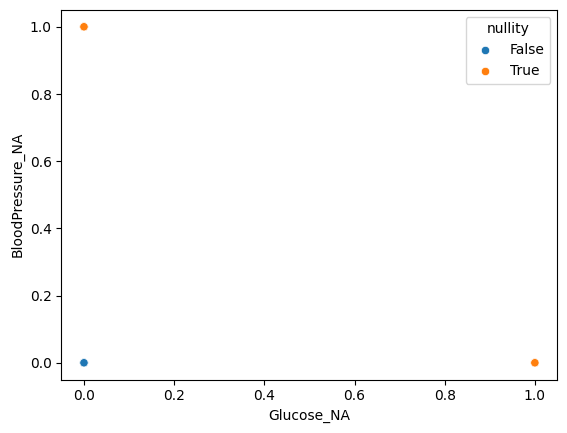

In [32]:
(
    diabetes
    .select_dtypes(
        exclude='category'  # excluye las variables categoricas
    )
    .pipe(
        lambda diabetes: diabetes[diabetes.columns[diabetes.isna().any()]] #seleccionar solo columnas que tengan valores faltantes
    )
    .missing.bind_shadow_matrix(true_string = True, false_string = False)
    .apply(
        lambda column: column if '_NA' in column.name else column_fill_with_dummies(column, proportion_below=0.05, jitter=0.075)
    )
    .assign(
        nullity = lambda diabetes: diabetes.Glucose_NA | diabetes.BloodPressure_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data = df,
                x='Glucose_NA',
                y= 'BloodPressure_NA',
                hue='nullity'
            )
        )
    )
)

<Axes: >

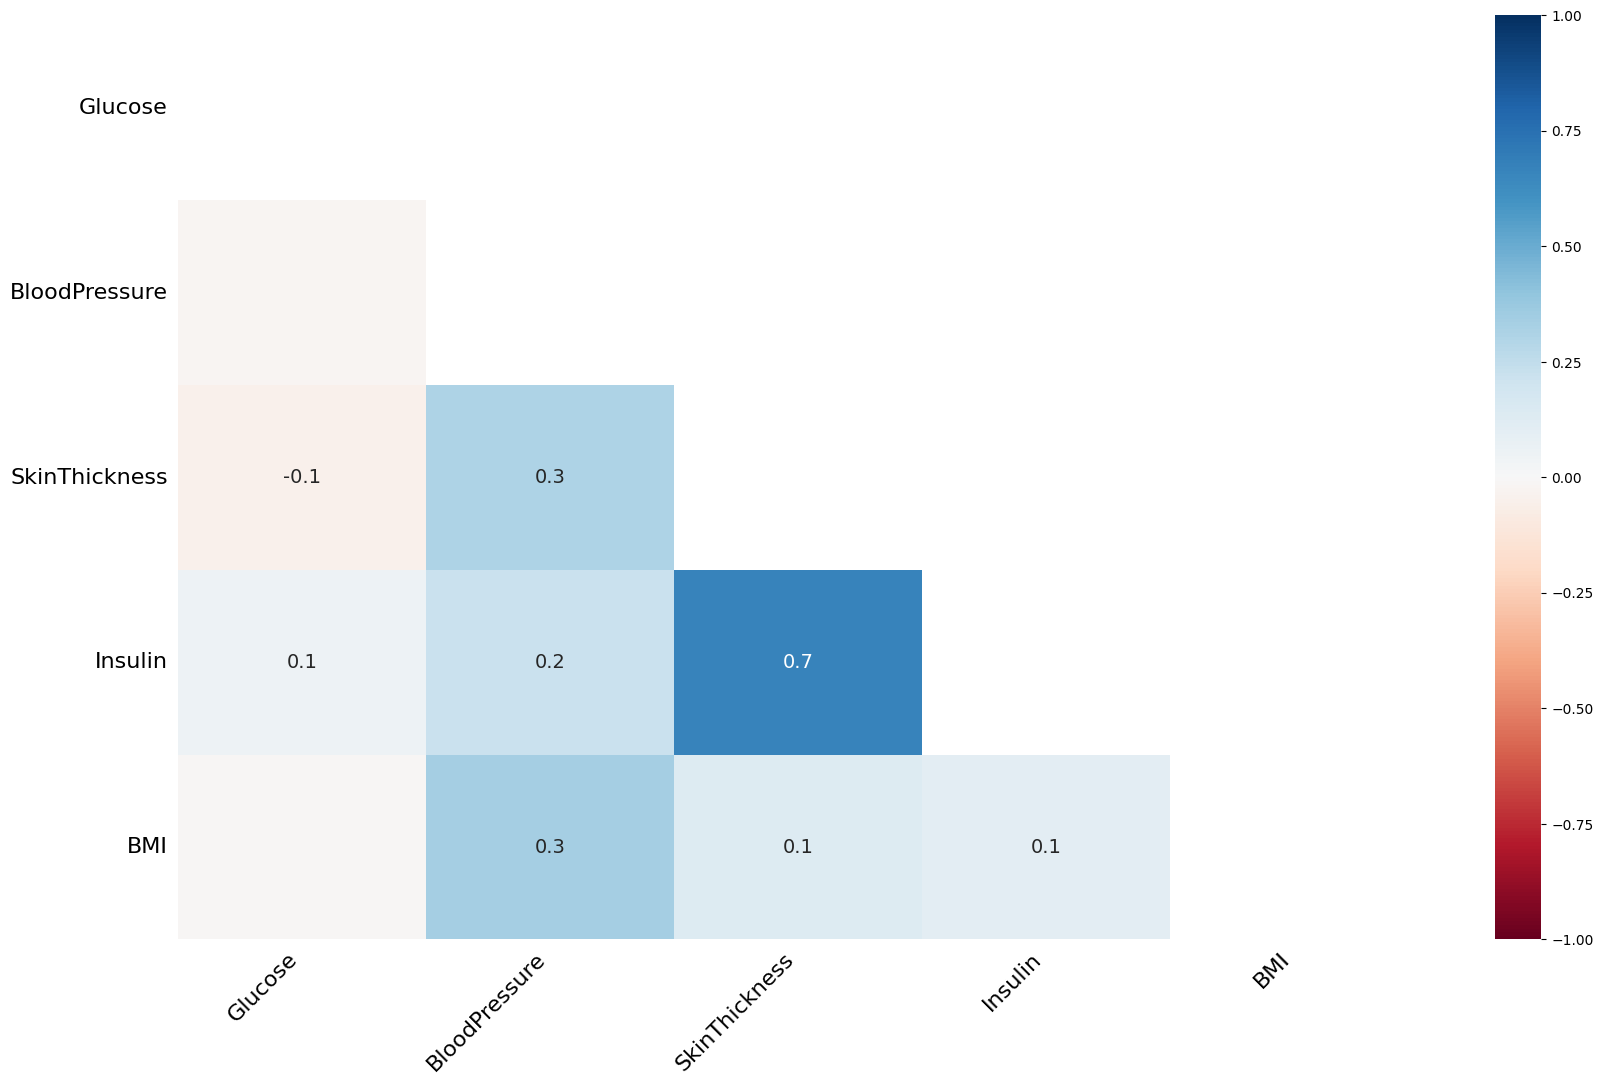

In [34]:
import missingno as msno
msno.heatmap(diabetes)


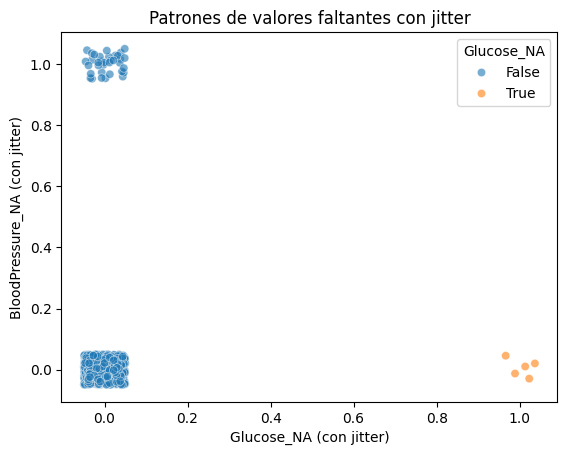

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Creamos columnas auxiliares para los valores faltantes
diabetes["Glucose_NA"] = diabetes["Glucose"].isna()
diabetes["BloodPressure_NA"] = diabetes["BloodPressure"].isna()


# Agregamos ruido a los valores binarios
noise = lambda x: x + np.random.uniform(-0.05, 0.05, size=x.shape)

sns.scatterplot(
    x=noise(diabetes["Glucose_NA"].astype(int)),
    y=noise(diabetes["BloodPressure_NA"].astype(int)),
    hue=diabetes["Glucose_NA"],  # o nullity si tienes mapeo
    alpha=0.6
)
plt.xlabel("Glucose_NA (con jitter)")
plt.ylabel("BloodPressure_NA (con jitter)")
plt.title("Patrones de valores faltantes con jitter")
plt.show()


## Correlación de nulidad

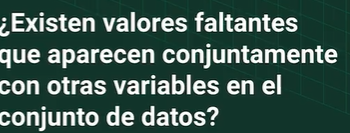

In [37]:
import missingno

<Axes: >

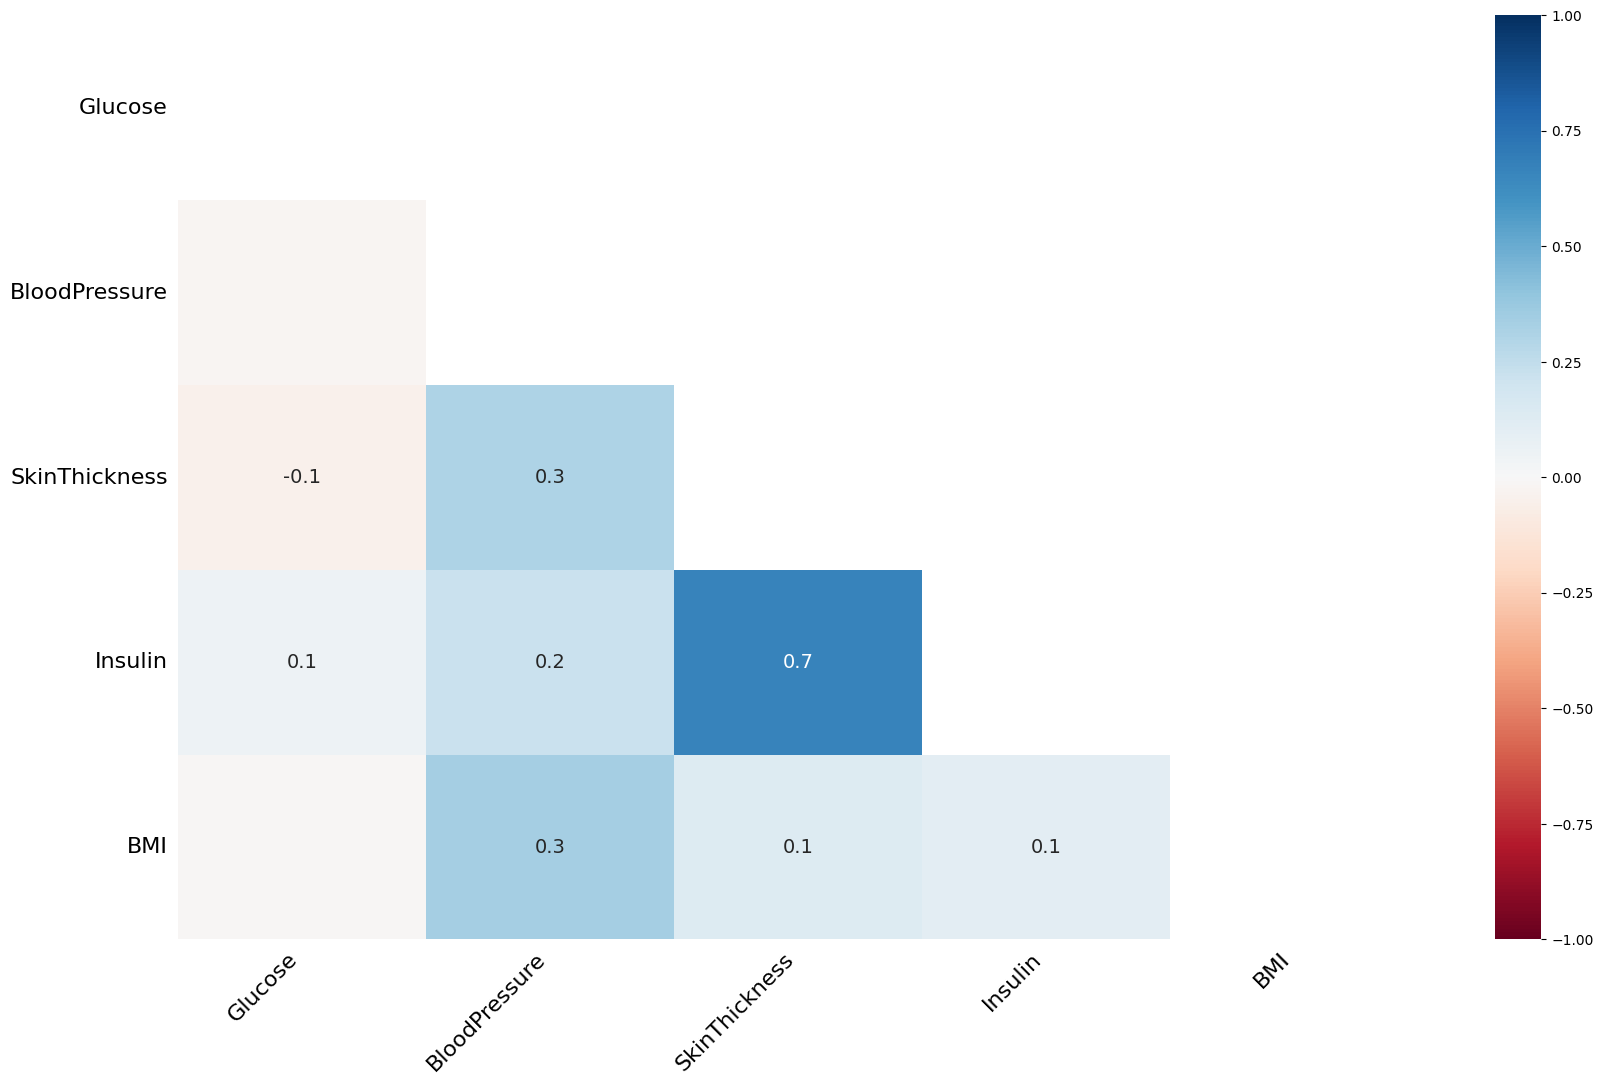

In [41]:
import missingno as msno
msno.heatmap(diabetes)


<Axes: >

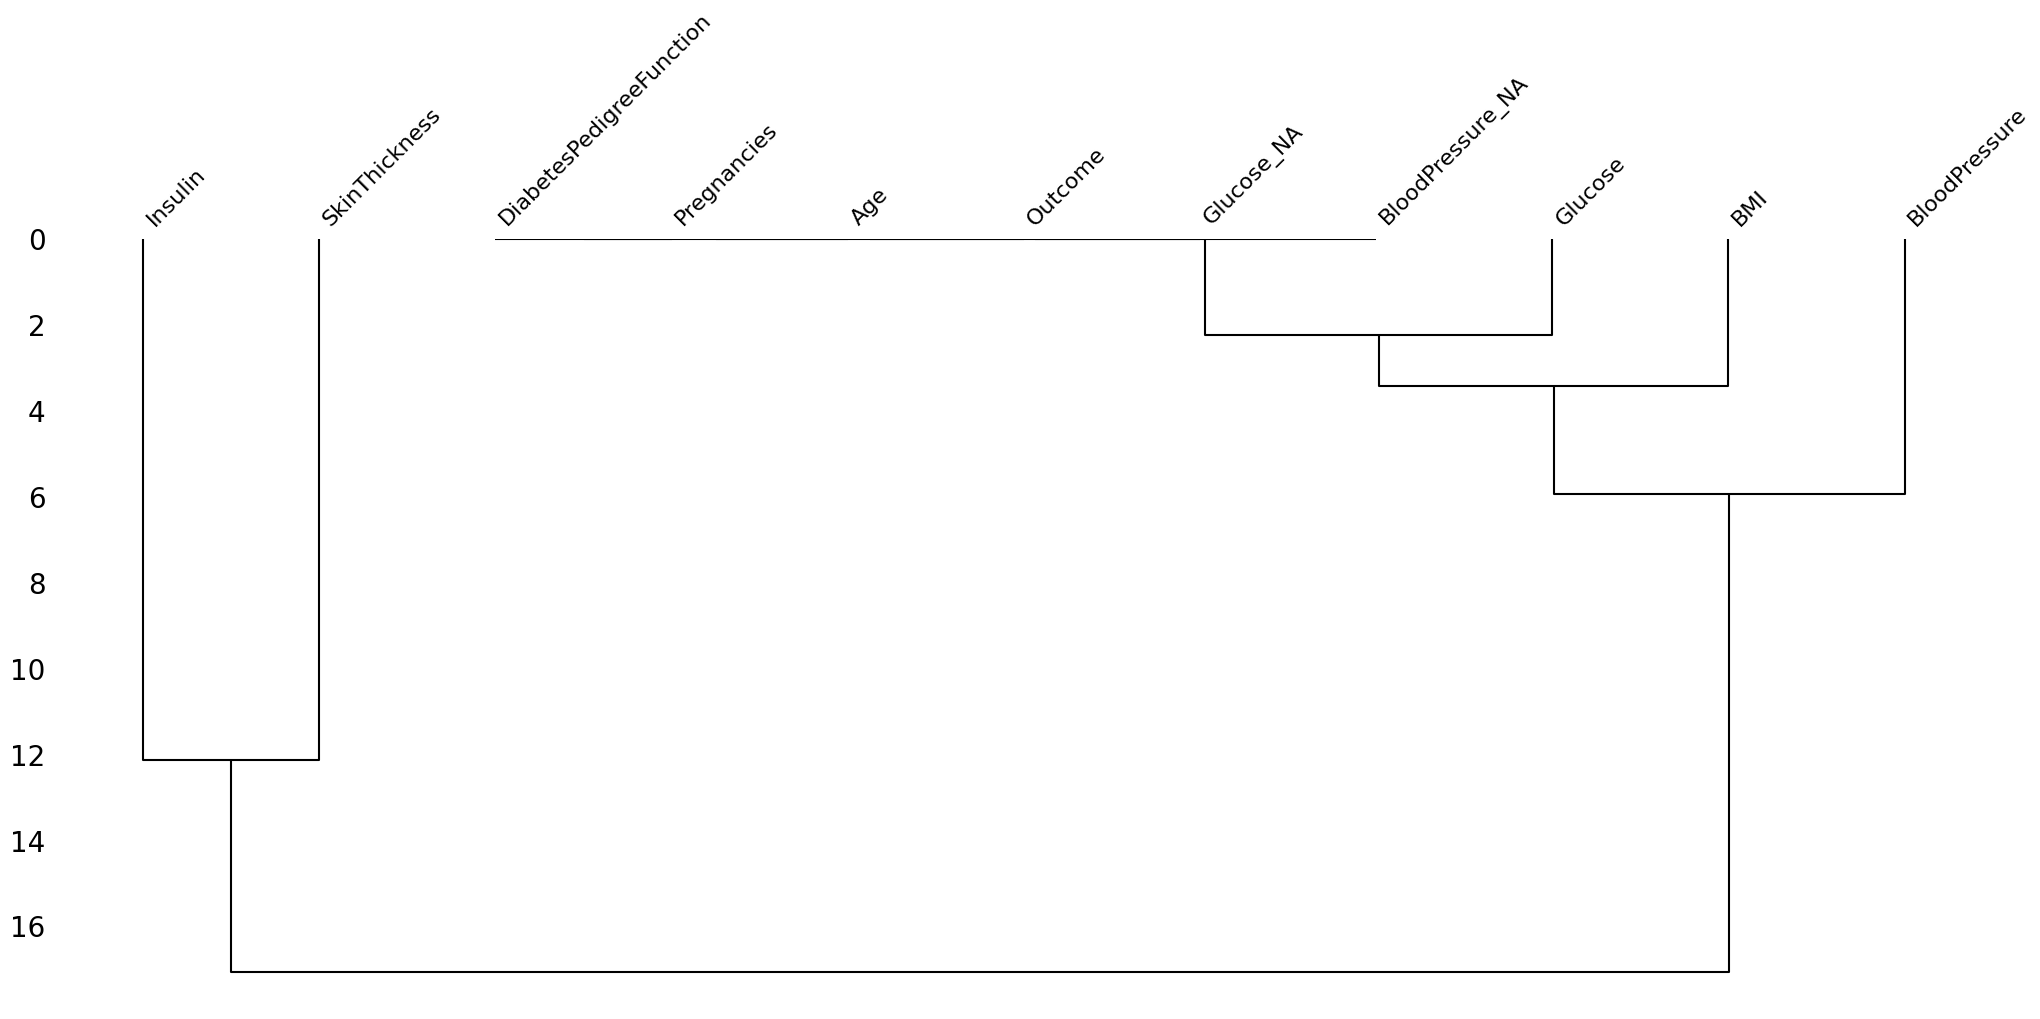

In [42]:
msno.dendrogram(diabetes)

Arbol que agrupa las columnsas que tienen correlaciones muy altas

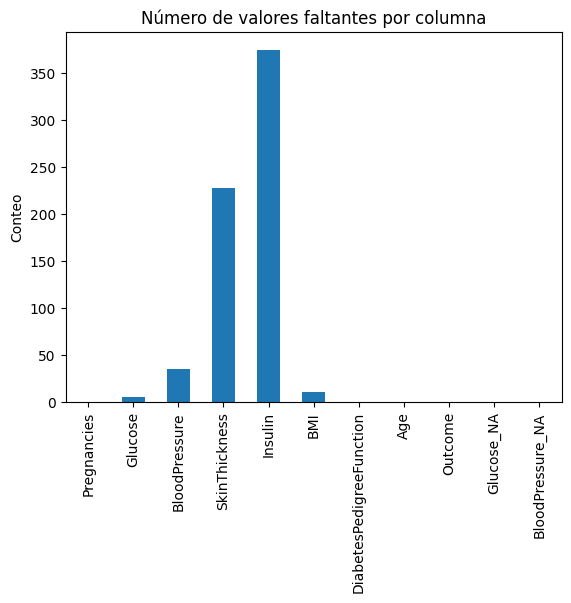

In [40]:
diabetes.isnull().sum().plot(kind='bar')
plt.title("Número de valores faltantes por columna")
plt.ylabel("Conteo")
plt.show()

